In [159]:
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud  import WordCloud

In [160]:
!pip install nltk

In [161]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [163]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


In [164]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report

In [165]:
data_col=['target','ids','date','flag','user','text']
data_encode='ISO-8859-1'
df=pd.read_csv('twitter_new.csv',encoding=data_encode,names=data_col)
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [166]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [168]:
print(len(df))

1600000


In [169]:
df.shape

(1600000, 6)

In [170]:
df.info

<bound method DataFrame.info of          target         ids                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfoot

In [171]:
df['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [172]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [173]:
df['target'].unique()

array([0, 4], dtype=int64)

In [174]:
df['target'].nunique()

2

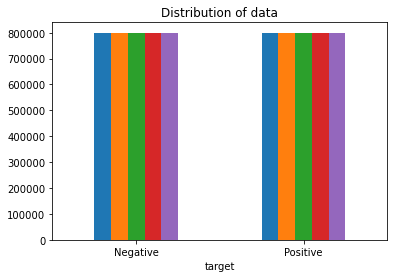

In [175]:
#Data visualization for target variables
ax=df.groupby('target').count().plot(kind='bar',title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'],rotation=0)
text,sentiment=list(df['text']),list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

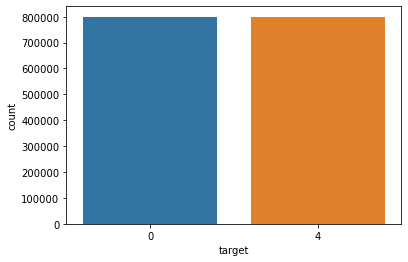

In [176]:
sns.countplot(x='target',data=df)

In [62]:
data=df[['text','target']]


In [116]:
data['target']=data['target'].replace(4,1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9152\764873134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target']=data['target'].replace(4,1)


In [117]:
data['target'].unique()

array([0, 1], dtype=int64)

In [118]:
data_pos=data[data['target']==1]
data_neg=data[data['target']==0]

In [119]:
data_pos=data_pos.iloc[:int(20000)]
data_pos=data_pos.iloc[:int(20000)]

In [120]:
dataset=pd.concat([data_pos,data_neg])

In [121]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

799995    sick  spending my day laying in bed listening ...
799996                                      gmail is down? 
799997                        rest in peace farrah! so sad 
799998    @eric_urbane sounds like a rival is flagging y...
799999    has to resit exams over summer...  wishes he w...
Name: text, dtype: object

In [122]:
stopwordlist=['a','about','above','after','again','ain','all','am','an','and','any','are','as',
          'at','be','because','been','before','being','below','between','both','can','d','did',
          'do','does','doing','down','during','each','few','for','from','further','had','has','have','having',
          'he','her','here','hers','herself','him','himself','his','how','i','if','in','into','is','it','its',
          'itself','just','ll','m','ma','me','more','most','my','myself','now','o','of','on','once','only','or','other',
          'our','ours','ourselves','out','own','re','s','same','t','than','that','thatll','the','their','theirs','them',
          'themselves', 'then', 'there', 'these', 'they', 'this', 'those','through', 'to', 'too','under', 'until', 'up', 
           've', 'very', 'was','we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom','why', 'will', 'with', 
           'won', 'y', 'you', 'youd','youll','youre','youve', 'your', 'yours', 'yourself', 'yourselves']

In [123]:
Stopwords=set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in Stopwords ])
dataset['text']=dataset['text'].apply(lambda text:cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [124]:
import string
english_punctuations=string.punctuation
punctuations_list=english_punctuations
def cleaning_punctuations(text):
    translator=str.maketrans('','',punctuations_list)
    return text.translate(translator)
dataset['text']=dataset['text'].apply(lambda text:cleaning_punctuations(text))
dataset['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                             rest peace farrah so sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

In [125]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+',r'1',text)
dataset['text']=dataset['text'].apply(lambda x:cleaning_repeating_char(x))
dataset['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                             rest peace farrah so sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

In [126]:
def cleaning_urls(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text']=dataset['text'].apply(lambda x:cleaning_urls(x))
dataset['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                             rest peace farrah so sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

In [127]:
def cleaning_numbers(data):
    return re.sub('[0-9]+','',data)
dataset['text']=dataset['text'].apply(lambda x:cleaning_numbers(x))
dataset['text'].tail()

799995    sick spending day laying bed listening taylorswif
799996                                           gmail down
799997                             rest peace farrah so sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

In [128]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'w+')
dataset['text']=dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [129]:
import nltk
st=nltk.PorterStemmer()
def stemming_on_text(data):
    text=[st.stem(word) for word in data]
    return data
dataset['text']=dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [134]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [135]:
x=data.text
y=data.target

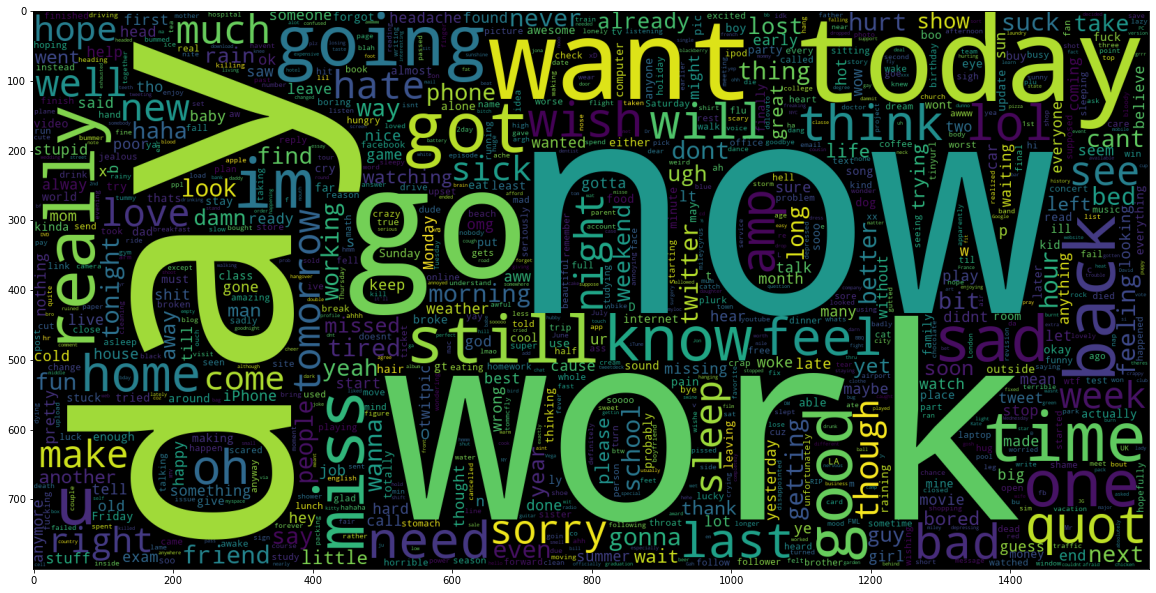

In [136]:
data_neg=data['text'][:800000]
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1000,width=1600,height=800,
            collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

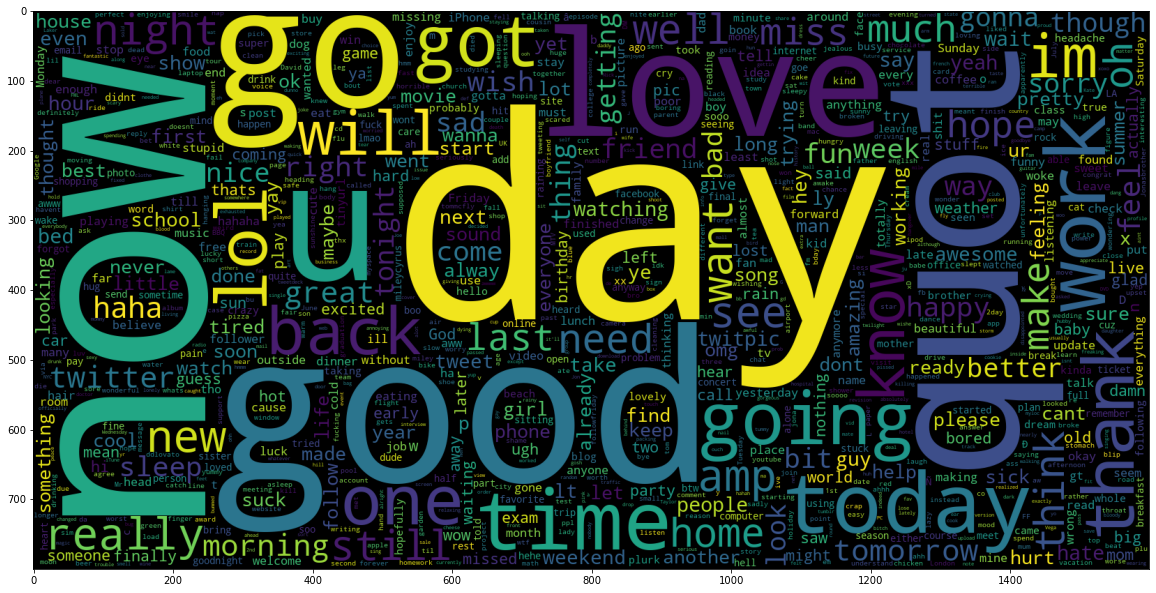

In [137]:
data_pos=data['text'][80000:]
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1000,width=1600,height=800,
            collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=5)

In [139]:
vectoriser=TfidfVectorizer(ngram_range=(1,2),max_features=500000)
vectoriser.fit(x_train)
print(len(vectoriser.get_feature_names()))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


500000


In [140]:
x_train=vectoriser.transform(x_train)
x_test=vectoriser.transform(x_test)

In [150]:
def model_Evaluate(model):
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    cf_matrix=confusion_matrix(y_test,y_pred)
    categories=['Negative','Positive']
    group_names=['True Neg','False Pos','False Neg','True Pos']
    group_percentages=['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels=[f'{v1}n{v2}' for v1,v2 in zip(group_names,group_percentages)]
    labels=np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix,annot=labels,cmap='Blues',fmt='',
               xticklabels=categories,yticklabels=categories)
    plt.xlabel("Predicted values",fontdict={'size':14},labelpad=10)
    plt.ylabel("Actual values",fontdict={'size':14},labelpad=10)
    plt.title("Confusion Matrix",fontdict={'size':18},pad=20)
    

              precision    recall  f1-score   support

           0       0.80      0.79      0.80    399651
           1       0.79      0.80      0.80    400349

    accuracy                           0.80    800000
   macro avg       0.80      0.80      0.80    800000
weighted avg       0.80      0.80      0.80    800000



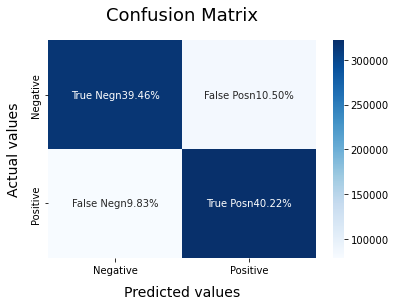

In [151]:
BNBmodel=BernoulliNB()
BNBmodel.fit(x_train,y_train)
model_Evaluate(BNBmodel)
y_pred1=BNBmodel.predict(x_test)

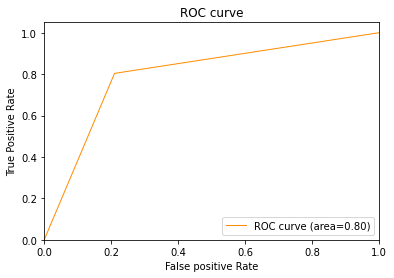

In [152]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,y_pred1)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr, color='darkorange',lw=1,label='ROC curve (area=%0.2f)'%roc_auc)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()


              precision    recall  f1-score   support

           0       0.81      0.80      0.81    399651
           1       0.81      0.82      0.81    400349

    accuracy                           0.81    800000
   macro avg       0.81      0.81      0.81    800000
weighted avg       0.81      0.81      0.81    800000



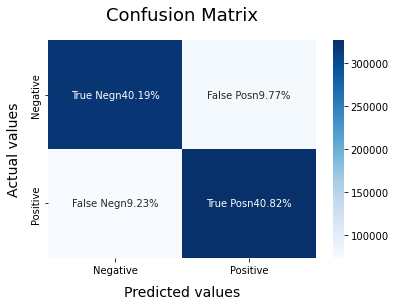

In [153]:
SVCmodel=LinearSVC()
SVCmodel.fit(x_train,y_train)
model_Evaluate(SVCmodel)
y_pred2=SVCmodel.predict(x_test)

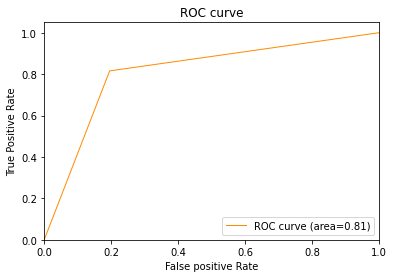

In [154]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,y_pred2)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr, color='darkorange',lw=1,label='ROC curve (area=%0.2f)'%roc_auc)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.81      0.82    399651
           1       0.82      0.83      0.82    400349

    accuracy                           0.82    800000
   macro avg       0.82      0.82      0.82    800000
weighted avg       0.82      0.82      0.82    800000



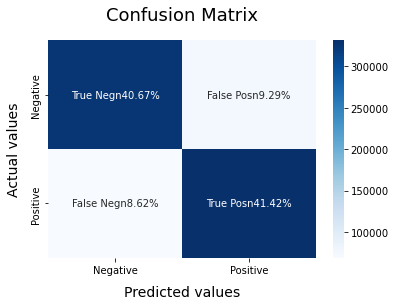

In [156]:
LRmodel=LogisticRegression(C=2,max_iter=1000,n_jobs=-1)
LRmodel.fit(x_train,y_train)
model_Evaluate(LRmodel)
y_pred3=LRmodel.predict(x_test)

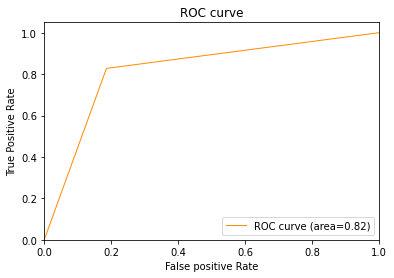

In [157]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,y_pred3)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr, color='darkorange',lw=1,label='ROC curve (area=%0.2f)'%roc_auc)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()